## Plots, distributions and tests

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Loading the data

In [24]:
mat_df = pd.read_csv("C:/Users/USER/Downloads/student-mat.csv", sep=";")
por_df = pd.read_csv("C:/Users/USER/Downloads/student-por.csv", sep=";")

## Merging the data

In [25]:
#merging dataframes
common_columns = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
df = pd.merge(mat_df, por_df, on=common_columns, how="inner", suffixes=("","_por"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          382 non-null    object
 1   sex             382 non-null    object
 2   age             382 non-null    int64 
 3   address         382 non-null    object
 4   famsize         382 non-null    object
 5   Pstatus         382 non-null    object
 6   Medu            382 non-null    int64 
 7   Fedu            382 non-null    int64 
 8   Mjob            382 non-null    object
 9   Fjob            382 non-null    object
 10  reason          382 non-null    object
 11  guardian        382 non-null    object
 12  traveltime      382 non-null    int64 
 13  studytime       382 non-null    int64 
 14  failures        382 non-null    int64 
 15  schoolsup       382 non-null    object
 16  famsup          382 non-null    object
 17  paid            382 non-null    object
 18  activities

## Renaming the columns

In [26]:
columns_torename = {"G1_por": "G1_port", "G2_por":"G2_port", "G3_por":"G3_port"}
df = df.rename(columns=columns_torename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          382 non-null    object
 1   sex             382 non-null    object
 2   age             382 non-null    int64 
 3   address         382 non-null    object
 4   famsize         382 non-null    object
 5   Pstatus         382 non-null    object
 6   Medu            382 non-null    int64 
 7   Fedu            382 non-null    int64 
 8   Mjob            382 non-null    object
 9   Fjob            382 non-null    object
 10  reason          382 non-null    object
 11  guardian        382 non-null    object
 12  traveltime      382 non-null    int64 
 13  studytime       382 non-null    int64 
 14  failures        382 non-null    int64 
 15  schoolsup       382 non-null    object
 16  famsup          382 non-null    object
 17  paid            382 non-null    object
 18  activities

In [27]:
#Eliminating those columns with suffix _por
df = df.loc[:, ~df.columns.str.endswith("_por")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      382 non-null    object
 1   sex         382 non-null    object
 2   age         382 non-null    int64 
 3   address     382 non-null    object
 4   famsize     382 non-null    object
 5   Pstatus     382 non-null    object
 6   Medu        382 non-null    int64 
 7   Fedu        382 non-null    int64 
 8   Mjob        382 non-null    object
 9   Fjob        382 non-null    object
 10  reason      382 non-null    object
 11  guardian    382 non-null    object
 12  traveltime  382 non-null    int64 
 13  studytime   382 non-null    int64 
 14  failures    382 non-null    int64 
 15  schoolsup   382 non-null    object
 16  famsup      382 non-null    object
 17  paid        382 non-null    object
 18  activities  382 non-null    object
 19  nursery     382 non-null    object
 20  higher    

In [28]:
#renaming the mathematics scores
columns_torename = {"G1": "G1_math", "G2":"G2_math", "G3":"G3_math"}
df = df.rename(columns=columns_torename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      382 non-null    object
 1   sex         382 non-null    object
 2   age         382 non-null    int64 
 3   address     382 non-null    object
 4   famsize     382 non-null    object
 5   Pstatus     382 non-null    object
 6   Medu        382 non-null    int64 
 7   Fedu        382 non-null    int64 
 8   Mjob        382 non-null    object
 9   Fjob        382 non-null    object
 10  reason      382 non-null    object
 11  guardian    382 non-null    object
 12  traveltime  382 non-null    int64 
 13  studytime   382 non-null    int64 
 14  failures    382 non-null    int64 
 15  schoolsup   382 non-null    object
 16  famsup      382 non-null    object
 17  paid        382 non-null    object
 18  activities  382 non-null    object
 19  nursery     382 non-null    object
 20  higher    

## Changing values labels

In [29]:
schools = {"GP": "Gabriel Pereira", "MS": "Mousinho da Silveira"}
sexes = {"F": "female", "M":"male"}

In [30]:
df["school"] = df["school"].map(schools)

In [31]:
df["sex"] = df["sex"].map(sexes)

## Plotting

### Histograms

<Axes: xlabel='G3_port', ylabel='Count'>

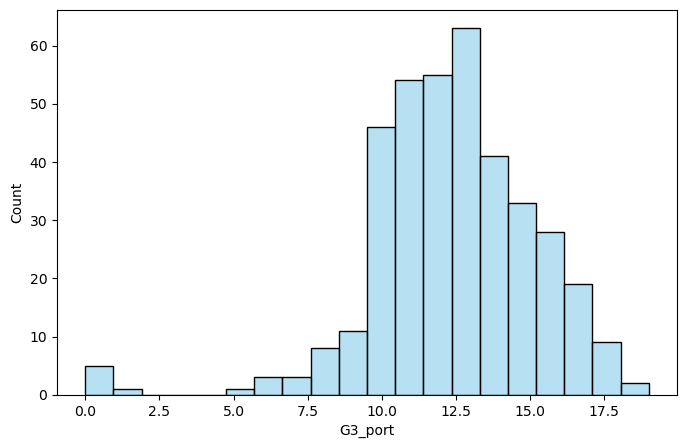

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3_port'], bins=20, color='skyblue', label='A', alpha=0.6)

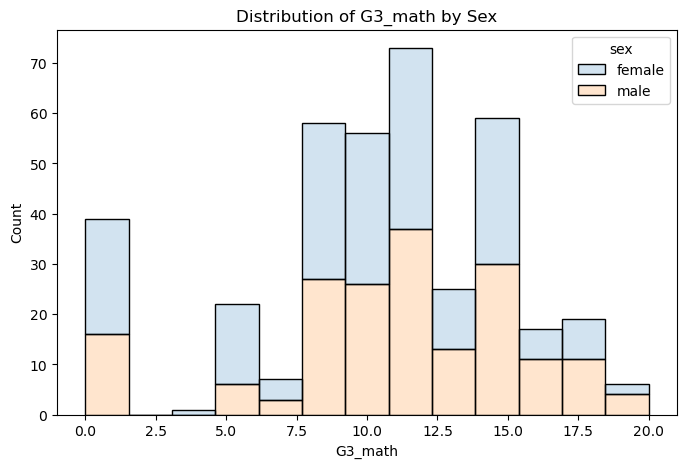

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(
    x="G3_math",
    data=df,
    hue="sex",
    multiple="stack",  # or "layer" to overlap
    alpha=0.2          # make colors 50% transparent
)

plt.title("Distribution of G3_math by Sex")
plt.show()

In [34]:
df["sex"].value_counts()

sex
female    198
male      184
Name: count, dtype: int64

### boxplots

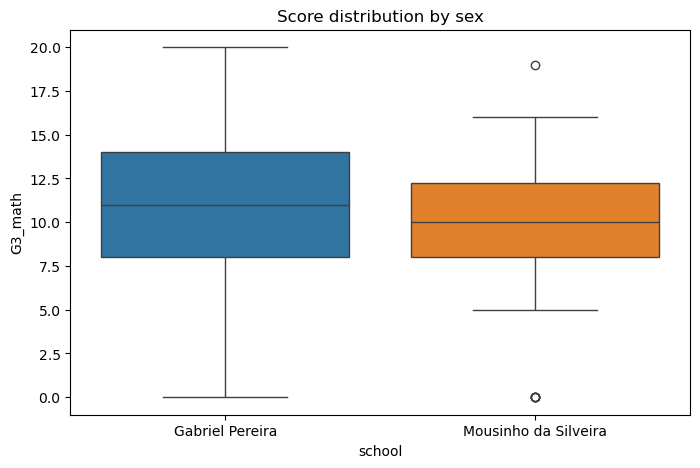

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="school", y="G3_math", data=df, hue="school")
plt.title("Score distribution by sex")
plt.show()

### density plots

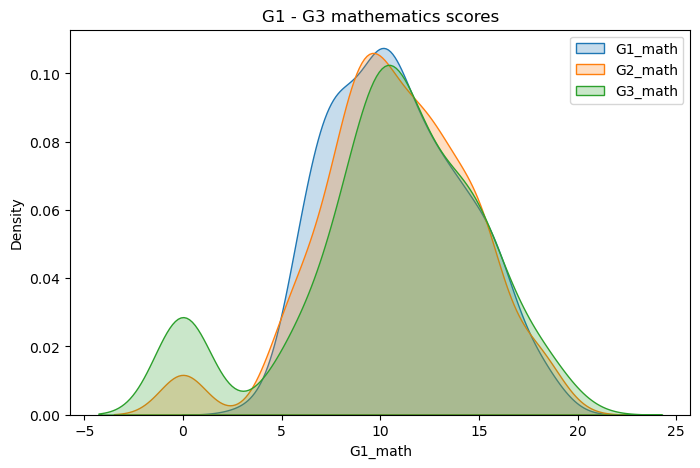

In [36]:
# Create one figure
plt.figure(figsize=(8, 5))

# Plot all distributions on the same axes
sns.kdeplot(df['G1_math'], fill=True, label='G1_math')
sns.kdeplot(df['G2_math'], fill=True, label='G2_math')
sns.kdeplot(df['G3_math'], fill=True, label='G3_math')

plt.legend()
plt.title("G1 - G3 mathematics scores")
plt.show()

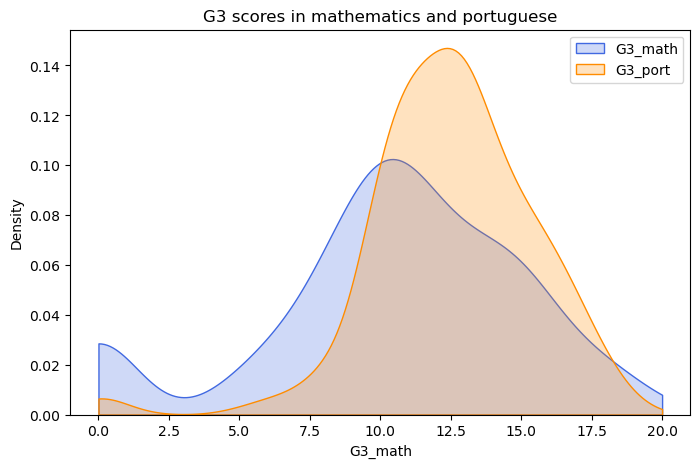

In [37]:
plt.figure(figsize=(8, 5))


sns.kdeplot(df['G3_math'], fill=True, label='G3_math', color='royalblue', clip=(0,20))
sns.kdeplot(df['G3_port'], fill=True, label='G3_port', color='darkorange', clip=(0,20))

plt.legend()
plt.title("G3 scores in mathematics and portuguese")
plt.show()

### barplots

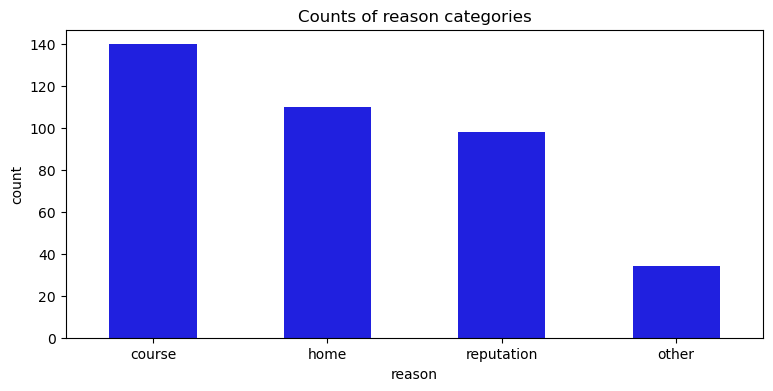

In [43]:
reason = df["reason"].value_counts()
reason_df = pd.DataFrame(reason).reset_index(drop=False)

plt.figure(figsize=(9, 4))
sns.barplot(x="reason", y="count", width=0.5, color="blue", data=reason_df)
plt.title("Counts of reason categories")
plt.show()

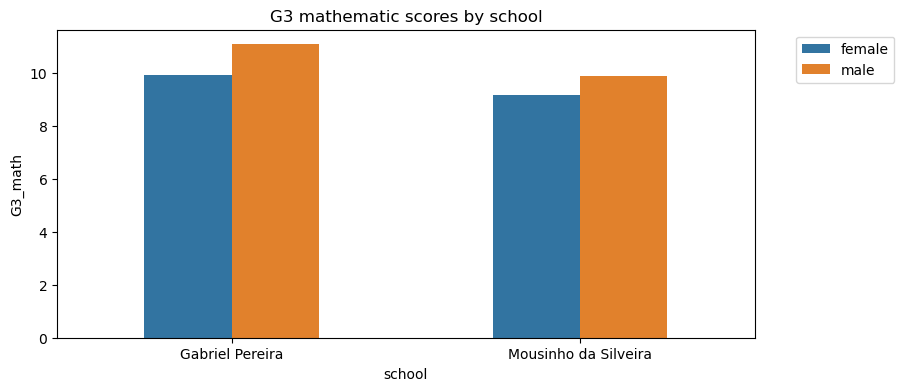

In [39]:
plt.figure(figsize=(9, 4))

sns.barplot(df, x="school", y="G3_math", hue="sex", width = 0.5, errorbar=None)
plt.title("G3 mathematic scores by school")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### heatmap

In [40]:
guardian_address = pd.crosstab(df["address"], df["guardian"])
guardian_address

guardian,father,mother,other
address,,,
R,15,63,3
U,76,212,13


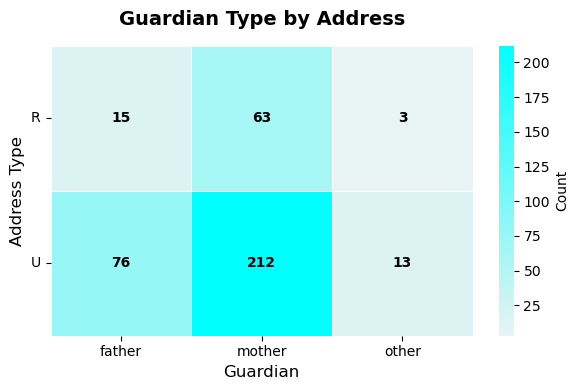

In [42]:
# Set up the figure
plt.figure(figsize=(6, 4))


custom_palette = sns.light_palette("cyan", as_cmap=True)

# Create the heatmap
sns.heatmap(
    guardian_address,
    annot=True,            # show numbers
    fmt=".0f",             # no scientific notation
    cmap=custom_palette,     
    linewidths=0.5,        # subtle grid lines
    cbar_kws={"label": "Count"},  # colorbar label
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  # nicer text
)




# Customize titles and labels
plt.title("Guardian Type by Address", fontsize=14, weight="bold", pad=15)
plt.xlabel("Guardian", fontsize=12)
plt.ylabel("Address Type", fontsize=12)

# Tidy up tick labels
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()